# Project Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



# Hypothesis Generation

- Daily-use products such as foods and water should have a higher sales as compared with other products.
- The more visible the products/items within the store, the higher chance it can attract customers and can generate bigger sales.
- Sales can be higher every weekends or holidays.
- Advertisement can improve or boost the sales of a certain items. 
- Discounts and promo can attract customers and can lead to higher sales.
- Outlets/Stores present in prime location have higher sales as compared with other stores.
- The larger the size of the outlet, the more products it can sell, therefore the higher sales it can generate. 
- The longer the years operation of a store tend to have higher sales due to the relationship and trust built with the customers.

# Loading packages and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 
pd.options.mode.chained_assignment = None

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,KFold

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

# Data Structure and Content

In [3]:
train_df = pd.read_csv('./data/Train.csv')
test_df = pd.read_csv('./data/Test.csv')

train_df['df_type'] = 'train'
test_df['df_type'] = 'test'
df = pd.concat([train_df, test_df], ignore_index=True)

In [4]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales df_type  
0  Supermarket Type1          3735.1380   train  
1  Supermarket Type2           443.4228   train  
2  Supermarket Type1          2097.2700   train  
3      Grocery Store           732.3800   train  
4  Supermarket Type1           994.7052   train

In [5]:
df.shape

(14204, 13)

# Exploratory Data Analysis

### Descriptive Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  df_type                    14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [7]:
df.describe(include='all').T

count unique                    top  freq  \
Item_Identifier              14204   1559                  FDU15    10   
Item_Weight                11765.0    NaN                    NaN   NaN   
Item_Fat_Content             14204      5                Low Fat  8485   
Item_Visibility            14204.0    NaN                    NaN   NaN   
Item_Type                    14204     16  Fruits and Vegetables  2013   
Item_MRP                   14204.0    NaN                    NaN   NaN   
Outlet_Identifier            14204     10                 OUT027  1559   
Outlet_Establishment_Year  14204.0    NaN                    NaN   NaN   
Outlet_Size                  10188      3                 Medium  4655   
Outlet_Location_Type         14204      3                 Tier 3  5583   
Outlet_Type                  14204      4      Supermarket Type1  9294   
Item_Outlet_Sales           8523.0    NaN                    NaN   NaN   
df_type                      14204      2                  train  8523   

                                  mean          std     min       25%  \
Item_Identifier                    NaN          NaN     NaN       NaN   
Item_Weight                  12.792854     4.652502   4.555      8.71   
Item_Fat_Content                   NaN          NaN     NaN       NaN   
Item_Visibility               0.065953     0.051459     0.0  0.027036   
Item_Type                          NaN          NaN     NaN       NaN   
Item_MRP                    141.004977    62.086938   31.29    94.012   
Outlet_Identifier                  NaN          NaN     NaN       NaN   
Outlet_Establishment_Year  1997.830681     8.371664  1985.0    1987.0   
Outlet_Size                        NaN          NaN     NaN       NaN   
Outlet_Location_Type               NaN          NaN     NaN       NaN   
Outlet_Type                        NaN          NaN     NaN       NaN   
Item_Outlet_Sales          2181.288914  1706.499616   33.29  834.2474   
df_type                            NaN          NaN     NaN       NaN   

                                50%        75%         max  
Item_Identifier                 NaN        NaN         NaN  
Item_Weight                    12.6      16.75       21.35  
Item_Fat_Content                NaN        NaN         NaN  
Item_Visibility            0.054021   0.094037    0.328391  
Item_Type                       NaN        NaN         NaN  
Item_MRP                    142.247   185.8556    266.8884  
Outlet_Identifier               NaN        NaN         NaN  
Outlet_Establishment_Year    1999.0     2004.0      2009.0  
Outlet_Size                     NaN        NaN         NaN  
Outlet_Location_Type            NaN        NaN         NaN  
Outlet_Type                     NaN        NaN         NaN  
Item_Outlet_Sales          1794.331  3101.2964  13086.9648  
df_type                         NaN        NaN         NaN

### Checking the unique values

In [8]:
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
df_type                          2
dtype: int64

In [9]:
df['Item_Identifier'][:20]

0     FDA15
1     DRC01
2     FDN15
3     FDX07
4     NCD19
5     FDP36
6     FDO10
7     FDP10
8     FDH17
9     FDU28
10    FDY07
11    FDA03
12    FDX32
13    FDS46
14    FDF32
15    FDP49
16    NCB42
17    FDP49
18    DRI11
19    FDU02
Name: Item_Identifier, dtype: object

In [10]:
cols = df.select_dtypes('object').columns.to_list()
cols = [x for x in cols if x not in ['Item_Identifier', 'df_type']]

for col in cols:
    print(f'**Column: {col}**')
    print(df[col].value_counts())
    print('')

**Column: Item_Fat_Content**
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

**Column: Item_Type**
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

**Column: Outlet_Identifier**
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

**Column: Outlet_Size**
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


### Missing Values

In [11]:
missingval = df.isnull().sum()
percentage_missing = 100 * df.isnull().sum()/len(train_df)
missing_table = pd.concat([missingval,percentage_missing],axis=1)
missing_table = missing_table.rename(columns = {0:'MissingValues', 1:'Percentage'})
missing_table.sort_values(by='MissingValues',ascending=False)

MissingValues  Percentage
Item_Outlet_Sales                   5681   66.654934
Outlet_Size                         4016   47.119559
Item_Weight                         2439   28.616684
Item_Identifier                        0    0.000000
Item_Fat_Content                       0    0.000000
Item_Visibility                        0    0.000000
Item_Type                              0    0.000000
Item_MRP                               0    0.000000
Outlet_Identifier                      0    0.000000
Outlet_Establishment_Year              0    0.000000
Outlet_Location_Type                   0    0.000000
Outlet_Type                            0    0.000000
df_type                                0    0.000000

In [12]:
df[df['df_type']=='test'].isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
df_type                         0
dtype: int64

In [13]:
df[df['df_type']=='train'].isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
df_type                         0
dtype: int64

### Duplicate Values

In [14]:
duplicated = df.duplicated().sum()
print('Number of duplicated rows:', duplicated)

Number of duplicated rows: 0


# Univariate Analysis

In [15]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True

### Target Variable - Item_Outlet_Sales	

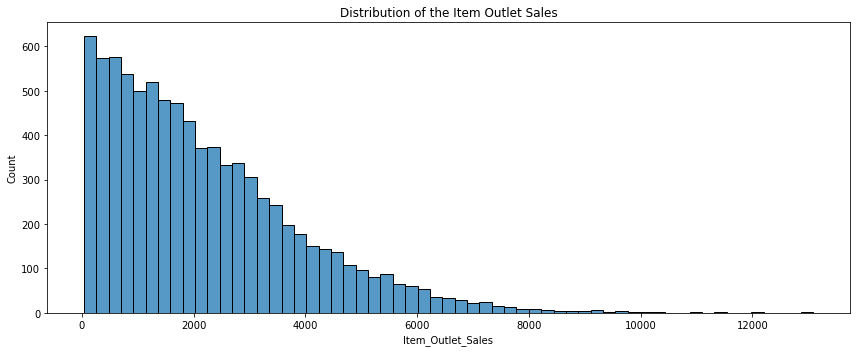

In [16]:
sns.histplot(df['Item_Outlet_Sales']).set_title('Distribution of the Item Outlet Sales')
plt.show()

### Feature Variables

In [17]:
object_columns = train_df.select_dtypes('object').columns
numerical_columns = train_df.select_dtypes(['int64','float64']).columns
object_df = train_df[object_columns]
numerical_df = train_df[numerical_columns]

In [18]:
discrete_columns = [col for col in object_columns if train_df[col].nunique()>20]
object_df[discrete_columns].head()

Item_Identifier
0           FDA15
1           DRC01
2           FDN15
3           FDX07
4           NCD19

In [19]:
object_df[discrete_columns].nunique()

Item_Identifier    1559
dtype: int64

In [20]:
object_df.drop(columns=['Item_Identifier', 'df_type'],inplace=True)
numerical_df.drop(columns='Item_Outlet_Sales',inplace=True)

**Categorical Variables**

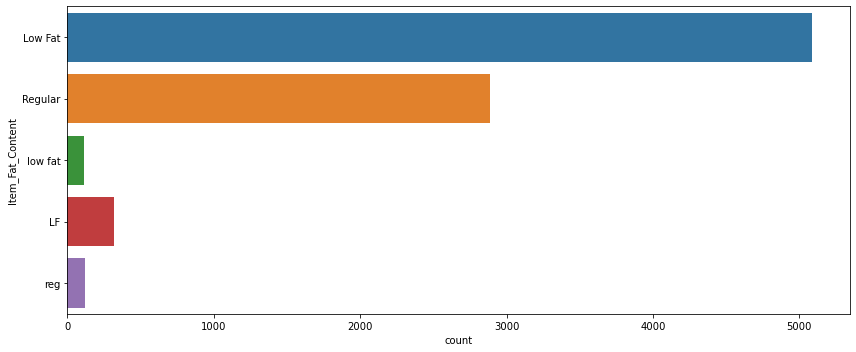

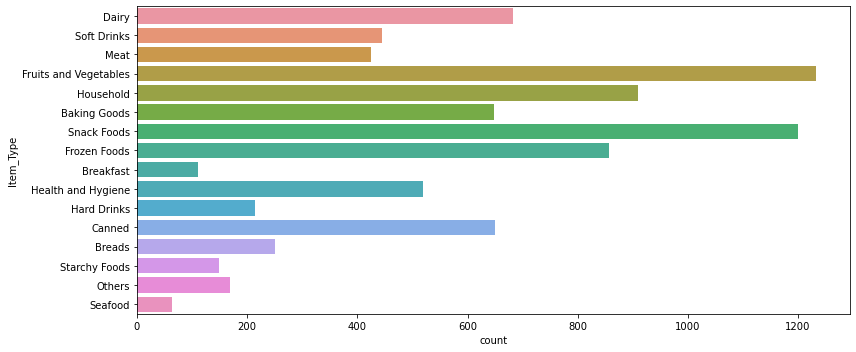

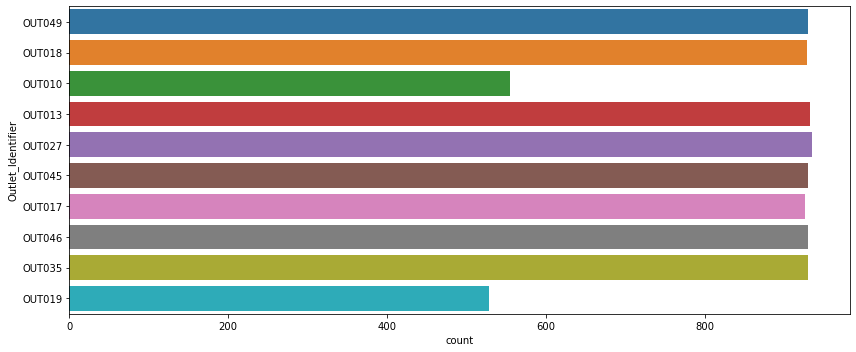

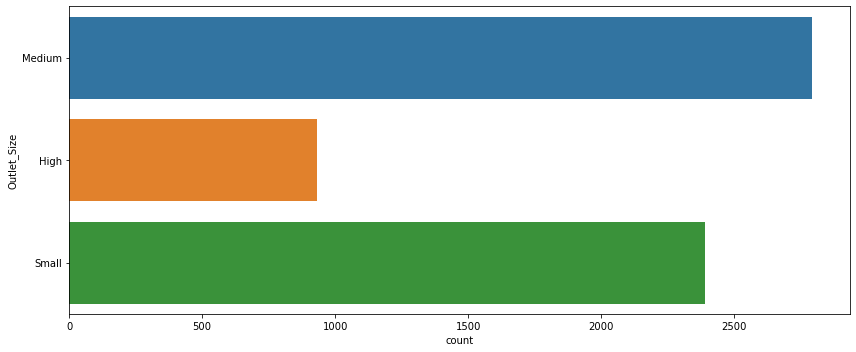

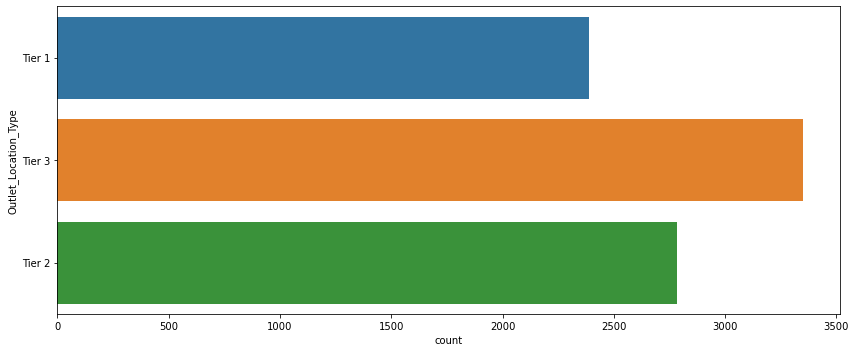

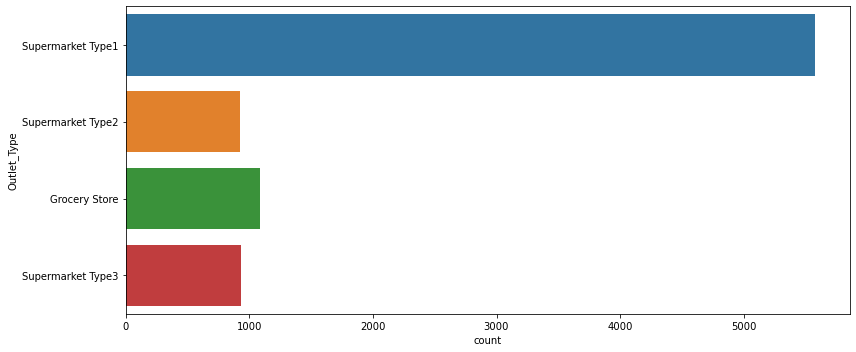

In [21]:
for col in object_df:
    sns.countplot(y=col, data=object_df)
    plt.show()

**Numerical Variables**

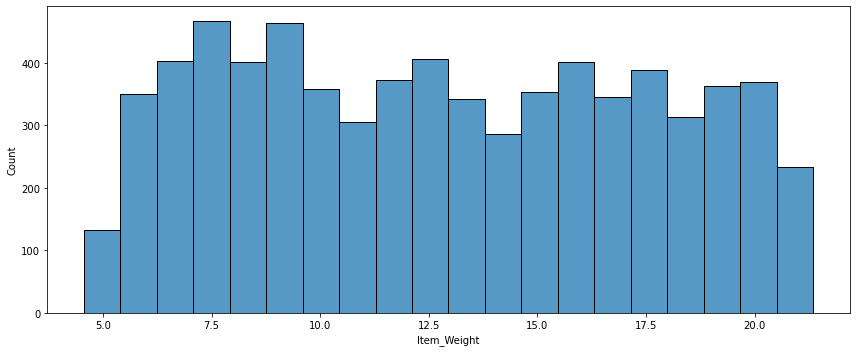

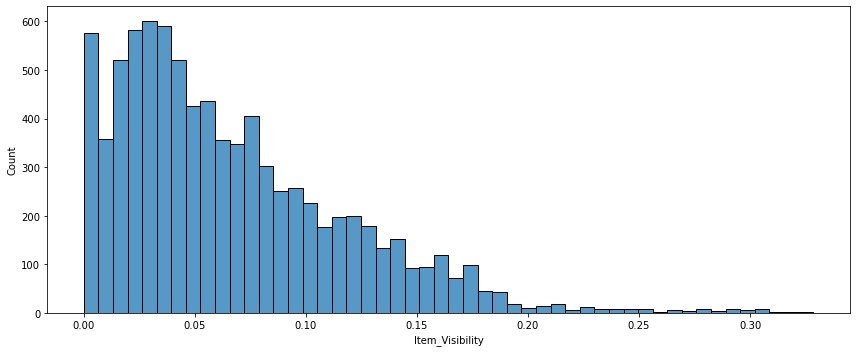

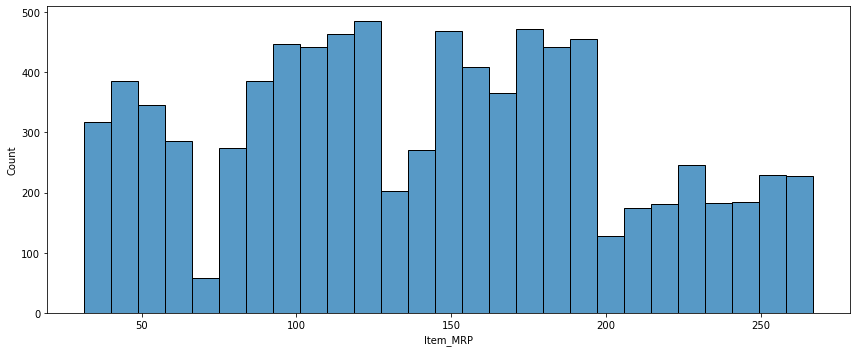

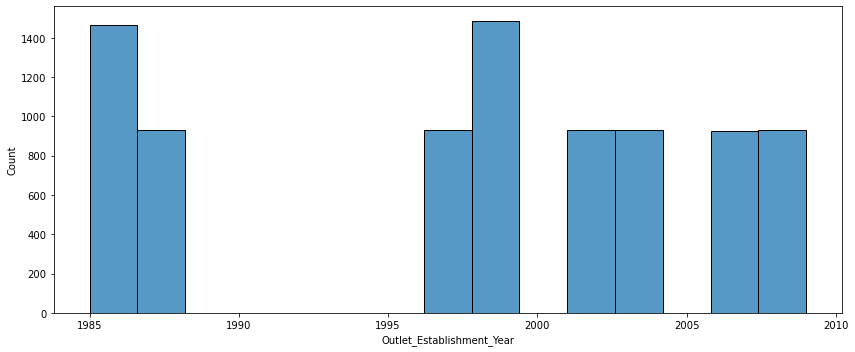

In [22]:
for col in numerical_df:
    sns.histplot(numerical_df[col])
    plt.show()

**Observations:**

# Bivariate Analysis

### Numerical vs Numerical (Numerical Features vs Target Variable)

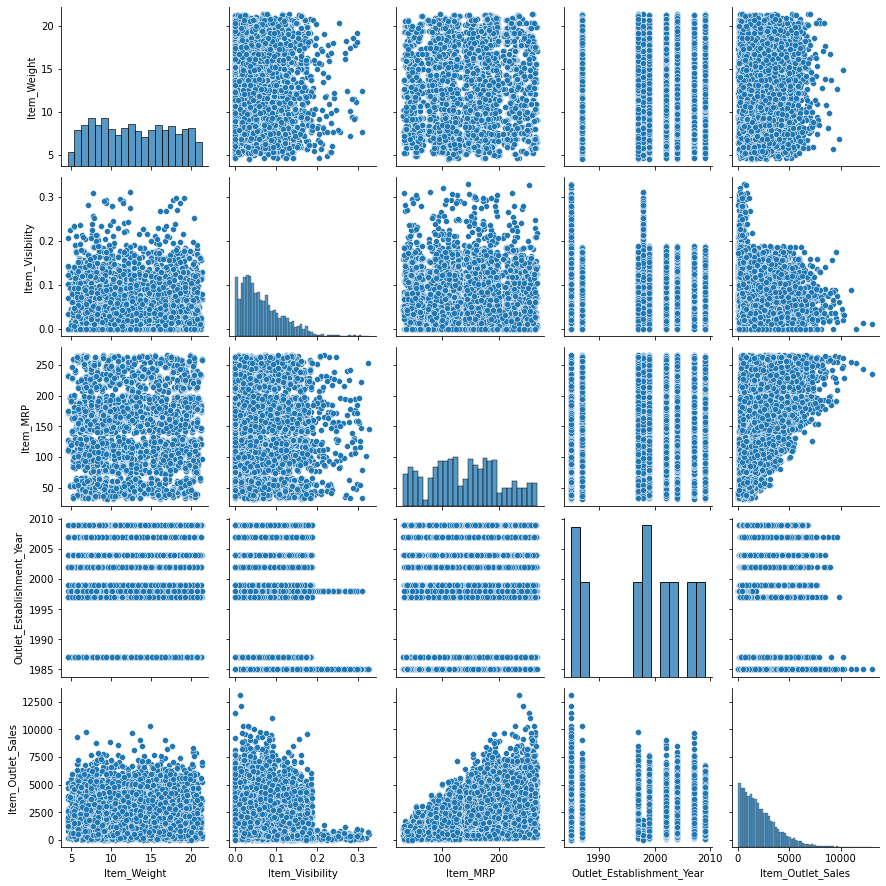

In [23]:
sns.pairplot(train_df)

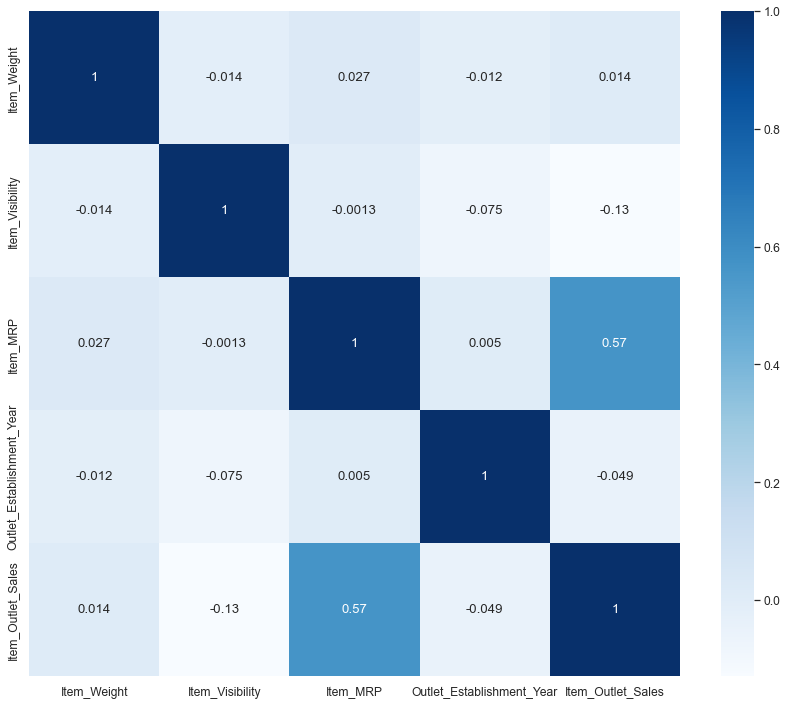

In [24]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1.1)
sns.heatmap(train_df.corr(),annot=True,cmap="Blues")
plt.show()

### Categorical vs Numerical (Object Features vs Target Variable)

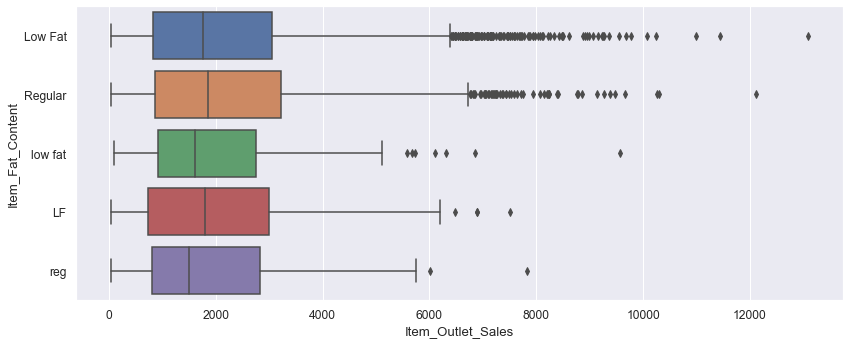

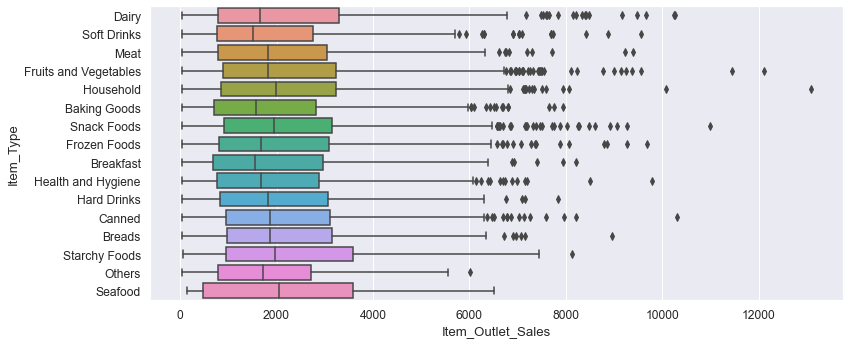

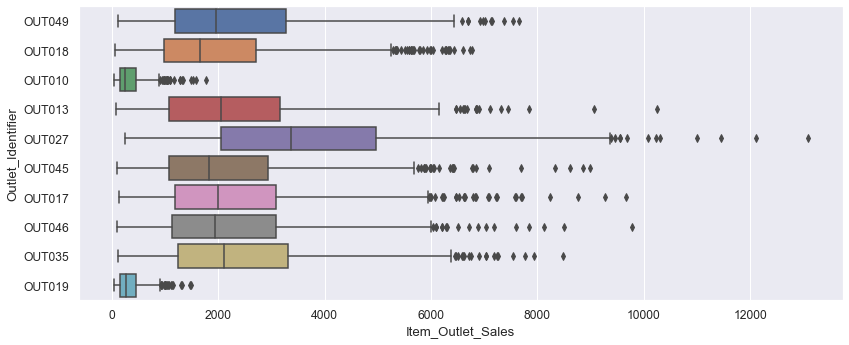

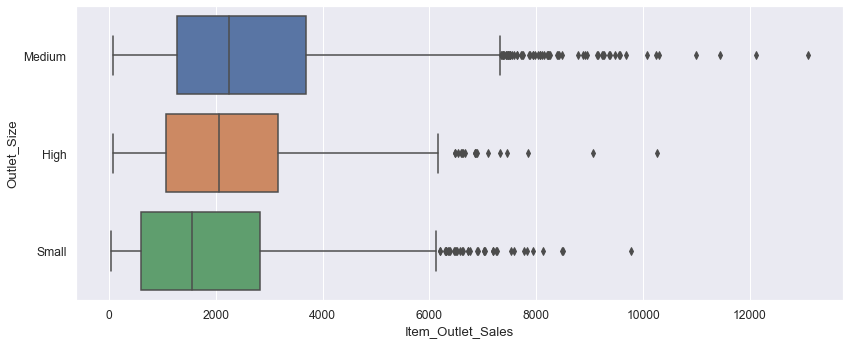

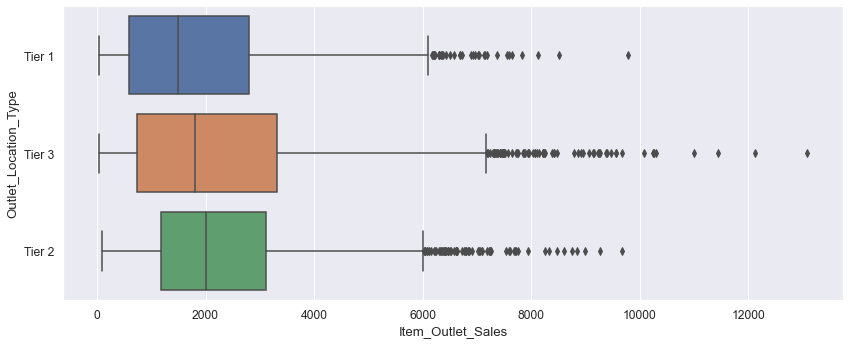

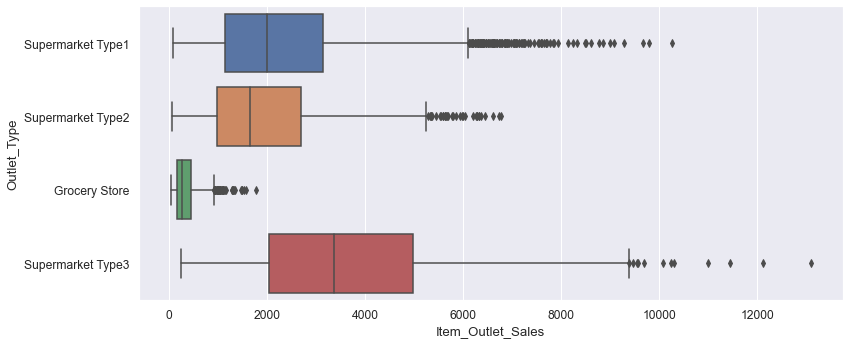

In [25]:
for col in object_df.columns:
    sns.boxplot(y=train_df[col], x='Item_Outlet_Sales', data=train_df)
    plt.show()

**Observations**

- Total shape of the dataset is (14204, 13)
- The dataset has 7 object columns (excluding df_type column) and 5 numerical columns 
- The memory usage of the dataset is 1.4+ MB.
- There are 14204 item sales, but there are 1559 unique items in the data.
- Most of the missing items in Item_Outlet_Sales are only present in testing data (Since this is the target variable)
- Missing values are present in Item_Weight and Outlet_Size.
- There are no duplicated rows in the dataset
- Most of the outlet present in the data were established between 1985 to 2009.
- In the Item_identifier feature, the first 2 letters seems to be the category code of the item while the last 3 is the unique id of item. Most common 2 id are FD, DR and NC. 
- There are repeating data that can be combine later in the Item_Fat_content feature: Low Fat, LF and low fat; Regular and reg
- OUT010 and OUT019 are the least frequent outlet. These outlets have significantly smaller number of sales.
- The common characteristics of the items are fruit and vegetables and has low fat content
- Most  of the outlet type, size and location type are supermarket type 1, medium and tier 3, respectively
- The unique count of Item_MRP is greater than the number of items, this means that every an item may have different prices in every outlet 
- Item weighs from 5 to 20. 
- Item_visibility column is skewed to the right. It seems there are 'zero' value where it is an impossible value since zero means absense or not visible.
- The Target Variable: Item_Outlet_Sales is right skewed. Most of the outlet have a sales below 2000.
- Item_outlet_sales and the Item_MRP have 0.57 positive correlation with one another

# Data Preprocessing and Feature Engineering

Based on the EDA, the following actions are need to be done:
- Fill in missing values
- Correct zero values in Item_Visibility
- Slice the first 2 letter of the Item_Identifier to get the Item_Category.
- Rename similar items in Item_Fat_Content
- Convert outlet_establishment_year into years of operation
- Encode all categorical values into numerical values
- Treat the skewness issues in the dataset
- Dropped unnecessary columns
- Split the updated data into train and test

### Missing Value Treatment

In [26]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
df_type                         0
dtype: int64

In [27]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [28]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
mode_imputer = SimpleImputer(strategy='most_frequent')
df['Outlet_Size'] = mode_imputer.fit_transform(df)

In [29]:
df['Outlet_Size'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [30]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
df_type                         0
dtype: int64

### Correct zero values in Item_Visibility

In [31]:
df[df['Item_Visibility'] == 0.0]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3               FDX07    19.200000          Regular              0.0   
4               NCD19     8.930000          Low Fat              0.0   
5               FDP36    10.395000          Regular              0.0   
10              FDY07    11.800000          Low Fat              0.0   
32              FDP33    18.700000          Low Fat              0.0   
...               ...          ...              ...              ...   
14166           FDQ19    12.792854          Regular              0.0   
14171           FDK26    12.792854          Regular              0.0   
14177           FDQ57     7.275000          Low Fat              0.0   
14184           DRG37    12.792854          Low Fat              0.0   
14202           FDJ26    15.300000          Regular              0.0   

                   Item_Type  Item_MRP Outlet_Identifier  \
3      Fruits and Vegetables  182.0950            OUT010   
4                  Household   53.8614            OUT013   
5               Baking Goods   51.4008            OUT018   
10     Fruits and Vegetables   45.5402            OUT049   
32               Snack Foods  256.6672            OUT018   
...                      ...       ...               ...   
14166  Fruits and Vegetables  244.3512            OUT019   
14171                 Canned  187.5240            OUT027   
14177            Snack Foods  144.5760            OUT013   
14184            Soft Drinks  155.7972            OUT027   
14202                 Canned  214.6218            OUT017   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                           1998       FDX07               Tier 3   
4                           1987       NCD19               Tier 3   
5                           2009       FDP36               Tier 3   
10                          1999       FDY07               Tier 1   
32                          2009       FDP33               Tier 3   
...                          ...         ...                  ...   
14166                       1985       FDQ19               Tier 1   
14171                       1985       FDK26               Tier 3   
14177                       1987       FDQ57               Tier 3   
14184                       1985       DRG37               Tier 3   
14202                       2007       FDJ26               Tier 2   

             Outlet_Type  Item_Outlet_Sales df_type  
3          Grocery Store           732.3800   train  
4      Supermarket Type1           994.7052   train  
5      Supermarket Type2           556.6088   train  
10     Supermarket Type1          1516.0266   train  
32     Supermarket Type2          3068.0064   train  
...                  ...                ...     ...  
14166      Grocery Store                NaN    test  
14171  Supermarket Type3                NaN    test  
14177  Supermarket Type1                NaN    test  
14184  Supermarket Type3                NaN    test  
14202  Supermarket Type1                NaN    test  

[879 rows x 13 columns]

In [32]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0,df['Item_Visibility'].mean())

In [33]:
df['Item_Visibility'].describe()

count    14204.000000
mean         0.070034
std          0.048602
min          0.003575
25%          0.033143
50%          0.062347
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

### Slice the first 2 letter of the Item_Identifier

In [34]:
df['Item_Type_Category'] = df['Item_Identifier'].astype(str).str[:2]

In [35]:
df['Item_Type_Category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

### Rename similar items in Item_Fat_Content

In [36]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [37]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [38]:
df[df['Item_Type_Category'] == 'NC']['Item_Fat_Content'].unique()

array(['Low Fat'], dtype=object)

Since there are 'NC' or Non-consumable item type category within our data, this means that these items should not have a fat content. Surprisingly most of these items are tagged as 'Low Fat' as their fat content

In [39]:
df['Item_Fat_Content'].mask(df['Item_Type_Category'] == 'NC' ,'Not Edible', inplace=True)

In [40]:
df[df['Item_Type_Category'] == 'NC']['Item_Fat_Content'].unique()

array(['Not Edible'], dtype=object)

In [41]:
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Not Edible    2686
Name: Item_Fat_Content, dtype: int64

### Convert outlet_establishment_year into years of operation

In [42]:
df['Operation_Years'] = 2019-df['Outlet_Establishment_Year']

### Encoding of Categorical Values

In [43]:
le = LabelEncoder()

In [44]:
cols = df.select_dtypes('object').columns.to_list()
cols.remove('df_type')
cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Type_Category']

In [45]:
for col in cols: 
    df[col]= le.fit_transform(df[col])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  int32  
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int32  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int32  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int32  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int32  
 9   Outlet_Location_Type       14204 non-null  int32  
 10  Outlet_Type                14204 non-null  int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  df_type                    14204 non-null  object 
 13  Item_Type_Category         14204 non-null  int

In [47]:
df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 0         0.016047          4   
1                8         5.92                 2         0.019278         14   
2              662        17.50                 0         0.016760         10   
3             1121        19.20                 2         0.065953          6   
4             1297         8.93                 1         0.065953          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  9                       1999          156   
1   48.2692                  3                       2009            8   
2  141.6180                  9                       1999          662   
3  182.0950                  0                       1998         1121   
4   53.8614                  1                       1987         1297   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales df_type  \
0                     0            1          3735.1380   train   
1                     2            2           443.4228   train   
2                     0            1          2097.2700   train   
3                     2            0           732.3800   train   
4                     2            1           994.7052   train   

   Item_Type_Category  Operation_Years  
0                   1               20  
1                   0               10  
2                   1               20  
3                   1               21  
4                   2               32

### Check the skewness of the dataset

In [48]:
nums = df.select_dtypes([np.number]).columns

In [49]:
skew = df[nums].skew().sort_values(key=abs, ascending=False)[:5]
skew

Item_Visibility              1.320683
Item_Outlet_Sales            1.177531
Outlet_Type                  0.927344
Operation_Years              0.396465
Outlet_Establishment_Year   -0.396465
dtype: float64

In [50]:
skewed = ['Item_Visibility']

for var in skewed:
    df[var] = np.where(df[var]==0, 0, 1)

### Drop unneccessary columns

In [51]:
cols_to_drop = ['Item_Identifier', 'Outlet_Establishment_Year']

In [52]:
df.drop(columns=cols_to_drop, inplace=True)

### Standard Scaling

In [53]:
df_scaled = df.drop(columns=['Item_Outlet_Sales','df_type'])
names = df_scaled.columns

In [54]:
scaler= MinMaxScaler()
scaled = scaler.fit_transform(df_scaled)
scaled_df = pd.DataFrame(scaled, columns=names)
scaled_df.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0     0.282525               0.0              0.0   0.266667  0.927507   
1     0.081274               1.0              0.0   0.933333  0.072068   
2     0.770765               0.0              0.0   0.666667  0.468288   
3     0.871986               1.0              0.0   0.400000  0.640093   
4     0.260494               0.5              0.0   0.600000  0.095805   

   Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0           1.000000     0.100128                   0.0     0.333333   
1           0.333333     0.005135                   1.0     0.666667   
2           1.000000     0.424904                   0.0     0.333333   
3           0.000000     0.719512                   1.0     0.000000   
4           0.111111     0.832478                   1.0     0.333333   

   Item_Type_Category  Operation_Years  
0                 0.5         0.416667  
1                 0.0         0.000000  
2                 0.5         0.416667  
3                 0.5         0.458333  
4                 1.0         0.916667

In [55]:
to_add = df[['Item_Outlet_Sales','df_type']]
df_new = pd.concat([scaled_df,to_add],axis=1)
df_new.head(10)

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0     0.282525               0.0              0.0   0.266667  0.927507   
1     0.081274               1.0              0.0   0.933333  0.072068   
2     0.770765               0.0              0.0   0.666667  0.468288   
3     0.871986               1.0              0.0   0.400000  0.640093   
4     0.260494               0.5              0.0   0.600000  0.095805   
5     0.347723               1.0              0.0   0.000000  0.085361   
6     0.541530               1.0              0.0   0.866667  0.111923   
7     0.490494               0.0              0.0   0.866667  0.324587   
8     0.693361               1.0              0.0   0.333333  0.278791   
9     0.871986               1.0              0.0   0.333333  0.664399   

   Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0           1.000000     0.100128                   0.0     0.333333   
1           0.333333     0.005135                   1.0     0.666667   
2           1.000000     0.424904                   0.0     0.333333   
3           0.000000     0.719512                   1.0     0.000000   
4           0.111111     0.832478                   1.0     0.333333   
5           0.333333     0.486521                   1.0     0.666667   
6           0.111111     0.446727                   1.0     0.333333   
7           0.555556     0.473684                   1.0     1.000000   
8           0.777778     0.282413                   0.5     0.333333   
9           0.222222     0.635430                   0.5     0.333333   

   Item_Type_Category  Operation_Years  Item_Outlet_Sales df_type  
0                 0.5         0.416667          3735.1380   train  
1                 0.0         0.000000           443.4228   train  
2                 0.5         0.416667          2097.2700   train  
3                 0.5         0.458333           732.3800   train  
4                 1.0         0.916667           994.7052   train  
5                 0.5         0.000000           556.6088   train  
6                 0.5         0.916667           343.5528   train  
7                 0.5         1.000000          4022.7636   train  
8                 0.5         0.291667          1076.5986   train  
9                 0.5         0.083333          4710.5350   train

### Split Train and Test Set

In [56]:
train = df_new[df_new['df_type']=='train']
test = df_new[df_new['df_type']=='test']

In [57]:
train.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0     0.282525               0.0              0.0   0.266667  0.927507   
1     0.081274               1.0              0.0   0.933333  0.072068   
2     0.770765               0.0              0.0   0.666667  0.468288   
3     0.871986               1.0              0.0   0.400000  0.640093   
4     0.260494               0.5              0.0   0.600000  0.095805   

   Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0           1.000000     0.100128                   0.0     0.333333   
1           0.333333     0.005135                   1.0     0.666667   
2           1.000000     0.424904                   0.0     0.333333   
3           0.000000     0.719512                   1.0     0.000000   
4           0.111111     0.832478                   1.0     0.333333   

   Item_Type_Category  Operation_Years  Item_Outlet_Sales df_type  
0                 0.5         0.416667          3735.1380   train  
1                 0.0         0.000000           443.4228   train  
2                 0.5         0.416667          2097.2700   train  
3                 0.5         0.458333           732.3800   train  
4                 1.0         0.916667           994.7052   train

In [58]:
test.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
8523     0.964275               0.0              0.0   0.866667  0.325012   
8524     0.222983               1.0              0.0   0.266667  0.237819   
8525     0.598095               0.5              0.0   0.733333  0.893316   
8526     0.164335               0.0              0.0   0.866667  0.525233   
8527     0.490494               1.0              0.0   0.266667  0.861381   

      Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
8523           1.000000     0.715019                   0.0     0.333333   
8524           0.222222     0.691913                   0.5     0.333333   
8525           0.000000     0.911425                   1.0     0.000000   
8526           0.222222     0.524390                   0.5     0.333333   
8527           0.555556     0.768293                   1.0     1.000000   

      Item_Type_Category  Operation_Years  Item_Outlet_Sales df_type  
8523                 0.5         0.416667                NaN    test  
8524                 0.5         0.083333                NaN    test  
8525                 1.0         0.458333                NaN    test  
8526                 0.5         0.083333                NaN    test  
8527                 0.5         1.000000                NaN    test

In [59]:
train.drop(columns='df_type', inplace=True)
test.drop(columns=['df_type','Item_Outlet_Sales'], inplace=True)

In [60]:
X = train.drop(columns='Item_Outlet_Sales')
y = train['Item_Outlet_Sales']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.2, shuffle = True, random_state = 42)

# Model Development

In [62]:
def fit_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    
def evaluate_model(model, X_test, y_test):

    # Predict Test Data 
    y_pred = model.predict(X_test)

    # Display the model's matrix
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred) 

    return {'rmse':rmse, 'mae':mae, 'mse':mse,'r2':r2}

In [79]:
# Linear Regression
lr = LinearRegression()
# Regularized Linear Regression - Lasso
lasso = Lasso(alpha=0.1)
# Regularized Linear Regression - Ridge
ridge = Ridge(alpha=.3)
# Random Forest Regression
rf = RandomForestRegressor()
# XGBoost Regression
xgb = XGBRegressor(learning_rate=0.1, max_depth=10, n_estimators=500)


model = {'LinearRegression': lr, 'Lasso Regression': lasso, 
         'Ridge Regression': ridge, 'Random Forest Regression':rf, 
         'XGBoost Regression': xgb}

In [80]:
for model_key, model_values in model.items():
    print('------------')
    print('Model: ',model_key)
    
    fit_model(model_values,X_train,y_train)
    mod = evaluate_model(model_values, X_test, y_test)
    # Print result
    print('RMSE:\n', mod['rmse'])
    print('MAE:\n', mod['mae'])
    print('MSE:\n', mod['mse'])
    print('R2:\n', mod['r2'])

------------
Model:  LinearRegression
RMSE:
 1142.1892955678077
MAE:
 856.9751363185832
MSE:
 1304596.3869096849
R2:
 0.5200107598927233
------------
Model:  Lasso Regression
RMSE:
 1142.1622092870682
MAE:
 856.9094965398798
MSE:
 1304534.5123235167
R2:
 0.5200335248918408
------------
Model:  Ridge Regression
RMSE:
 1142.2018476565306
MAE:
 856.9555842067829
MSE:
 1304625.0607899926
R2:
 0.5200002101517015
------------
Model:  Random Forest Regression
RMSE:
 1108.670792117887
MAE:
 770.3120278897361
MSE:
 1229150.925295303
R2:
 0.5477687777388487
------------
Model:  XGBoost Regression
RMSE:
 1198.7765348521614
MAE:
 832.3924658805364
MSE:
 1437065.1805121554
R2:
 0.4712726243151799


- Based on the result, Random Forest has the best performance and will be tuning it for better results.

# Hyperparameter Tuning

In [66]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor()

In [65]:
param_rf_1 = {
    'max_depth': [10,15,20],
    'min_samples_split': [7,9,10],
    'n_estimators': [200,300,400]}

# define grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_rf_1, cv = cv, 
                           n_jobs=-1, verbose= 1,return_train_score=True,scoring = 'r2')
grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best: 0.582119 using {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 400}


In [66]:
param_rf_2 = {
    'max_depth': [5,10,15,20],
    'min_samples_split': [7,10,13,16],
    'n_estimators': [100,200,300,400]}

# define grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_rf_2, cv = cv, 
                           n_jobs=-1, verbose= 1,return_train_score=True,scoring = 'r2')
grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best: 0.592717 using {'max_depth': 5, 'min_samples_split': 16, 'n_estimators': 100}


In [67]:
param_rf_3 = {
    'max_depth': [1,3,5,10,15],
    'min_samples_split': [5,10,15,20,25],
    'n_estimators': [100,200,300,400,500]}

# define grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_rf_3, cv = cv, 
                           n_jobs=-1, verbose= 1,return_train_score=True,scoring = 'r2')
grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Fitting 5 folds for each of 125 candidates, totalling 625 fits
Best: 0.592478 using {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}


In [67]:
param_rf_4 = {
    'max_depth': [1,3,5,10,15],
    'min_samples_split': [5,10,15,20,25],
    'n_estimators': [100,200,300,400,500]}

# define grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_rf_4, cv = 10, 
                           n_jobs=-1, verbose= 1,return_train_score=True,scoring = 'r2')
grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Fitting 10 folds for each of 125 candidates, totalling 1250 fits
Best: 0.593562 using {'max_depth': 5, 'min_samples_split': 20, 'n_estimators': 400}


In [68]:
param_rf_5 = {
    'max_depth': [5,10,15,20],
    'min_samples_split': [5,10,15,20],
    'n_estimators': [200,400,600,800]}

# define grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_rf_5, cv = cv, 
                           n_jobs=-1, verbose= 1,return_train_score=True,scoring = 'r2')
grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best: 0.592157 using {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}


In [69]:
param_rf_6 = {
    'max_depth': [5,10,15,20,25],
    'min_samples_split': [5,10,15,20,25],
    'n_estimators': [200,400,600,800,100]}

# define grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_rf_6, cv = cv, 
                           n_jobs=-1, verbose= 1,return_train_score=True,scoring = 'r2')
grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Fitting 5 folds for each of 125 candidates, totalling 625 fits
Best: 0.592501 using {'max_depth': 5, 'min_samples_split': 15, 'n_estimators': 100}


In [70]:
param_rf_6 = {
    'max_depth': [5,10,15,20,25],
    'min_samples_split': [5,10,15,20,25],
    'n_estimators': [200,400,600,800,100]}

# define grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_rf_6, cv = 10, 
                           n_jobs=-1, verbose= 1,return_train_score=True,scoring = 'r2')
grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Fitting 10 folds for each of 125 candidates, totalling 1250 fits
Best: 0.593371 using {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 800}


In [77]:
params =  {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 800}
tuned_model = RandomForestRegressor(**params)

In [81]:
model = {'BaselineModel': rf, 'FinalModel': tuned_model}

for model_key, model_values in model.items():
    print('------------')
    print('Model: ',model_key)
    
    fit_model(model_values,X_train,y_train)
    mod = evaluate_model(model_values, X_test, y_test)
    # Print result
    print('RMSE:\n', mod['rmse'])
    print('MAE:\n', mod['mae'])
    print('MSE:\n', mod['mse'])
    print('R2:\n', mod['r2'])

------------
Model:  BaselineModel
RMSE:
 1112.9469093779396
MAE:
 773.5759044492668
MSE:
 1238650.823093908
R2:
 0.5442735597762646
------------
Model:  FinalModel
RMSE:
 1020.9355640657072
MAE:
 715.6961411334468
MSE:
 1042309.4259741638
R2:
 0.61651180828801


# Final Predictions On The Test Dataset

In [82]:
prediction = tuned_model.predict(test)

In [83]:
output = pd.DataFrame({'Item_Outlet_Sales': prediction})
output.to_csv('ItemOutletSalesPrediction.csv', index=False)

# Summary

1. Five algorithms are used building the regression model: Linear, Ridge, Lasso, Random Forest and XGBoost.
2. Among these 5 algorithms, Random Forest has the highers r2 score and lowest errors (MAE, MSE, RMSE).
3. Hyperparamter tuning was done by using GridSearchCV and Kfolds.
4. After performing hyperparamter tuning, the performance of the model got better: Increased r2 score (from 0.54 into 0.616) and Errors decreased (RMSE, MSE and MAE).